In [1]:
# used for manipulating directory paths
import os

# For N-dimensional array manipulation
import numpy as np

# Plotting library
import matplotlib.pyplot as plt

# For data analysis and data structures in DataFrames 
import pandas as pd

import joblib


In [33]:
pwd

'/home/akuien/Projects/group6/loanProject'

In [2]:
data = 'Database/TrainingData.csv'
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(data)

# Display the first few rows of the DataFrame
print(df.head())

   Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

   CURRENT_HOUSE_YRS  Risk_Flag  
0   

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [4]:
dfShape = df.shape
print("Data frame shape: \n", dfShape )

df.isnull().sum()

Data frame shape: 
 (252000, 13)


Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [5]:
df= df.drop(['Id','CITY','STATE'], axis=1)

In [6]:
original_column_names = df.columns

# Get the current name of the 4th column
old_maritalStatus = df.columns[3]  # Assuming zero-based indexing
# Specify the new name for the 4th column
new_maritalStatus = 'Marital_Status'

# Get the current name of the 4th column
old_jobYears = df.columns[7]  # Assuming zero-based indexing
# Specify the new name for the 4th column
new_jobYears = 'Current_Job_Years'

# Get the current name of the 4th column
old_houseYears = df.columns[8]  # Assuming zero-based indexing
# Specify the new name for the 4th column
new_houseYears = 'Current_House_Years'

# Rename the 4th column
df.rename(columns={old_maritalStatus: new_maritalStatus}, inplace=True)
df.rename(columns={old_jobYears: new_jobYears}, inplace=True)
df.rename(columns={old_houseYears: new_houseYears}, inplace=True)

# Print the DataFrame to see the changes
print(df)
#df.info()

         Income  Age  Experience Marital_Status House_Ownership Car_Ownership  \
0       1303834   23           3         single          rented            no   
1       7574516   40          10         single          rented            no   
2       3991815   66           4        married          rented            no   
3       6256451   41           2         single          rented           yes   
4       5768871   47          11         single          rented            no   
...         ...  ...         ...            ...             ...           ...   
251995  8154883   43          13         single          rented            no   
251996  2843572   26          10         single          rented            no   
251997  4522448   46           7         single          rented            no   
251998  6507128   45           0         single          rented            no   
251999  9070230   70          17         single          rented            no   

                 Profession

In [8]:
from sklearn import preprocessing

In [9]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  

df['Marital_Status']= label_encoder.fit_transform(df['Marital_Status'])
print(df['Marital_Status'].unique())

df['House_Ownership']= label_encoder.fit_transform(df['House_Ownership'])
print(df['House_Ownership'].unique())

df['Car_Ownership']= label_encoder.fit_transform(df['Car_Ownership'])
print(df['Car_Ownership'].unique())

df['Profession']= label_encoder.fit_transform(df['Profession'])
print(df['Profession'].unique())

[1 0]
[2 0 1]
[0 1]
[33 43 47 11 31 20 25  2 18 37 23  0 39 38  4 46 17  9 28 16 12  6 27 13
 36 42 14  7 48 34 22  5 40 32 30 24 21 35  1 26 19 44 50 15  8  3 45 41
 10 29 49]


In [10]:
X = df.drop("Risk_Flag", axis=1)
Y = df["Risk_Flag"]

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [12]:
X_train, X_test, Y_train, Y_test= train_test_split(X , Y, test_size=0.30, random_state=42)

In [13]:
a,z = np.unique(Y, return_counts=True)

In [14]:
a,  

(array([0, 1]),)

In [15]:
z

array([221004,  30996])

In [16]:
data = pd.concat([X, Y], axis=1)

In [17]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = data[data['Risk_Flag'] == 0]
minority_class = data[data['Risk_Flag'] == 1]

upsampled_minority = resample(minority_class,
                              replace=True,
                              n_samples=z[0],
                              random_state=42)

data_up = pd.concat([upsampled_minority, majority_class])

# Splitting back into features and target
X_up = data_up.drop('Risk_Flag', axis=1)
Y_up = data_up['Risk_Flag']

In [18]:
a,z = np.unique(Y_up, return_counts=True)
a,z

(array([0, 1]), array([221004, 221004]))

(397808, 9)
classification report: 
              precision    recall  f1-score   support

           0       0.92      0.86      0.89    198980
           1       0.86      0.93      0.89    198828

    accuracy                           0.89    397808
   macro avg       0.89      0.89      0.89    397808
weighted avg       0.89      0.89      0.89    397808

Confusion matrix : 
[[170165  28815]
 [ 14805 184023]]
(353607, 9)
classification report: 
              precision    recall  f1-score   support

           0       0.96      0.86      0.91    176978
           1       0.88      0.96      0.92    176629

    accuracy                           0.91    353607
   macro avg       0.92      0.91      0.91    353607
weighted avg       0.92      0.91      0.91    353607

Confusion matrix : 
[[152804  24174]
 [  6215 170414]]
(309406, 9)
classification report: 
              precision    recall  f1-score   support

           0       0.98      0.87      0.92    154734
           1       

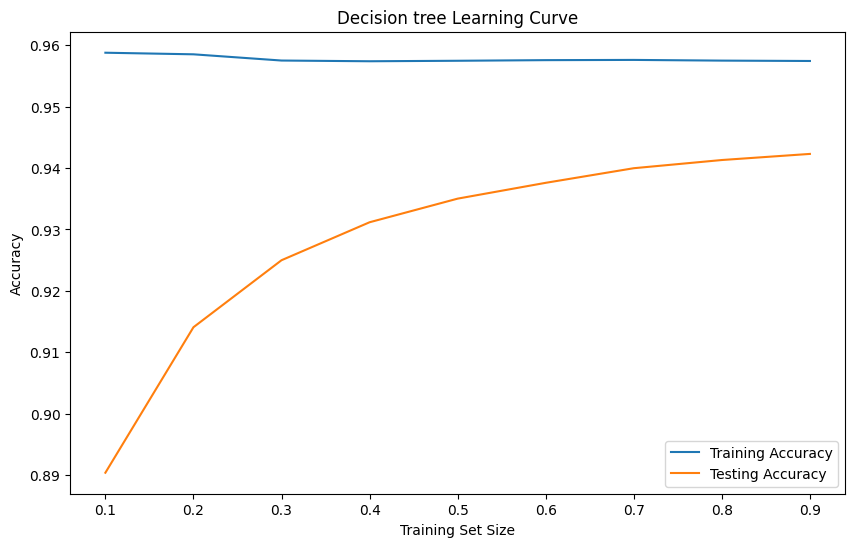

In [19]:
decTree_model = DecisionTreeClassifier(criterion="entropy",random_state=420)

# LEARNING CURVE
training_sizes = np.linspace(0.1, 0.9, 9)
train_accuracies = []
test_accuracies = []

for size in training_sizes:
    # Use a subset of the training data
    
    X_train, X_test, Y_train, Y_test= train_test_split(X_up , Y_up, test_size=1-size, random_state=42)
    #print(subset_size)
    # Train the model on the subset
    decTree_model.fit(X_train, Y_train)

    print(X_test.shape)
    # Calculate accuracy on both training and testing sets
    train_preds = decTree_model.predict(X_train)
    test_preds = decTree_model.predict(X_test)

    train_accuracies.append(accuracy_score(Y_train, train_preds))
   
    test_accuracies.append(accuracy_score(Y_test, test_preds))
    
    print("classification report: ")
    print(classification_report(Y_test,test_preds))
    print("Confusion matrix : ")
    print(confusion_matrix(Y_test,test_preds))
          
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_accuracies, label='Training Accuracy')
plt.plot(training_sizes, test_accuracies, label='Testing Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Decision tree Learning Curve')
plt.legend()
plt.show()

(44201, 9)
classification report: 
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     22109
           1       0.00      0.00      0.00     22092

    accuracy                           0.50     44201
   macro avg       0.25      0.50      0.33     44201
weighted avg       0.25      0.50      0.33     44201

confusion matrix: 


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

[[22109     0]
 [22092     0]]
(88402, 9)
classification report: 


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     44222
           1       0.00      0.00      0.00     44180

    accuracy                           0.50     88402
   macro avg       0.25      0.50      0.33     88402
weighted avg       0.25      0.50      0.33     88402

confusion matrix: 
[[44222     0]
 [44180     0]]
(132603, 9)
classification report: 


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     66315
           1       0.00      0.00      0.00     66288

    accuracy                           0.50    132603
   macro avg       0.25      0.50      0.33    132603
weighted avg       0.25      0.50      0.33    132603

confusion matrix: 
[[66315     0]
 [66288     0]]
(176804, 9)
classification report: 


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     88485
           1       0.00      0.00      0.00     88319

    accuracy                           0.50    176804
   macro avg       0.25      0.50      0.33    176804
weighted avg       0.25      0.50      0.33    176804

confusion matrix: 
[[88485     0]
 [88319     0]]
(221004, 9)
classification report: 


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

              precision    recall  f1-score   support

           0       0.50      1.00      0.67    110556
           1       0.00      0.00      0.00    110448

    accuracy                           0.50    221004
   macro avg       0.25      0.50      0.33    221004
weighted avg       0.25      0.50      0.33    221004

confusion matrix: 
[[110556      0]
 [110448      0]]
(265205, 9)
classification report: 


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

              precision    recall  f1-score   support

           0       0.50      1.00      0.67    132620
           1       0.00      0.00      0.00    132585

    accuracy                           0.50    265205
   macro avg       0.25      0.50      0.33    265205
weighted avg       0.25      0.50      0.33    265205

confusion matrix: 
[[132620      0]
 [132585      0]]
(309406, 9)
classification report: 


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

              precision    recall  f1-score   support

           0       0.50      1.00      0.67    154734
           1       0.00      0.00      0.00    154672

    accuracy                           0.50    309406
   macro avg       0.25      0.50      0.33    309406
weighted avg       0.25      0.50      0.33    309406

confusion matrix: 
[[154734      0]
 [154672      0]]
(353607, 9)
classification report: 


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    176978
           1       0.50      1.00      0.67    176629

    accuracy                           0.50    353607
   macro avg       0.25      0.50      0.33    353607
weighted avg       0.25      0.50      0.33    353607

confusion matrix: 
[[     0 176978]
 [     0 176629]]
(397808, 9)
classification report: 


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    198980
           1       0.50      1.00      0.67    198828

    accuracy                           0.50    397808
   macro avg       0.25      0.50      0.33    397808
weighted avg       0.25      0.50      0.33    397808

confusion matrix: 
[[     0 198980]
 [     0 198828]]


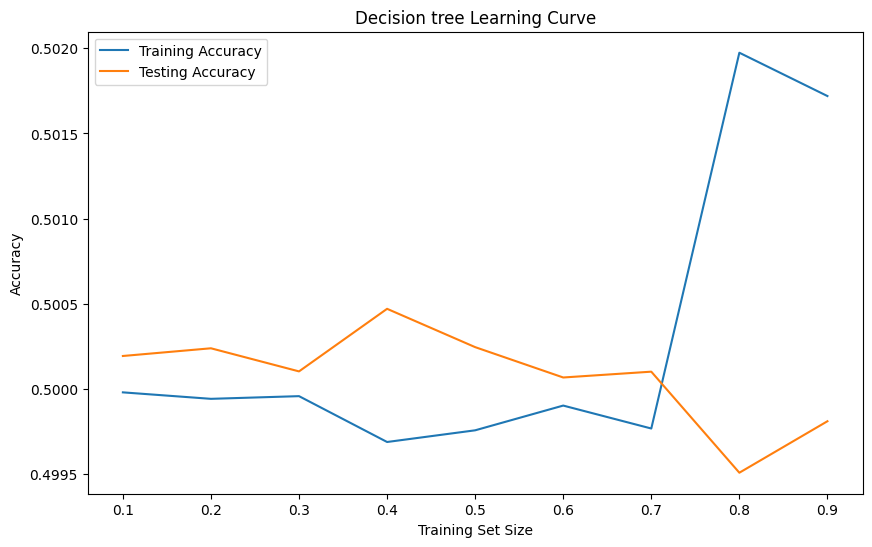

In [20]:
logReg_model = LogisticRegression()
# LEARNING CURVE
training_sizes = np.linspace(0.1, 0.9, 9)
train_accuracies = []
test_accuracies = []

for size in training_sizes:
    # Use a subset of the training data
    
    X_train, X_test, Y_train, Y_test= train_test_split(X_up , Y_up, test_size=size, random_state=42)
    #print(subset_size)
    # Train the model on the subset
    logReg_model.fit(X_train, Y_train)

    print(X_test.shape)
    # Calculate accuracy on both training and testing sets
    train_preds = logReg_model.predict(X_train)
    test_preds = logReg_model.predict(X_test)

    train_accuracies.append(accuracy_score(Y_train, train_preds))
    test_accuracies.append(accuracy_score(Y_test, test_preds))
    
    print("classification report: ")
    print(classification_report(Y_test,test_preds))
    print("confusion matrix: ")
    print(confusion_matrix(Y_test,test_preds))
          
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_accuracies, label='Training Accuracy')
plt.plot(training_sizes, test_accuracies, label='Testing Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Decision tree Learning Curve')
plt.legend()
plt.show()

(44201, 9)
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     22109
           1       0.92      1.00      0.96     22092

    accuracy                           0.95     44201
   macro avg       0.96      0.95      0.95     44201
weighted avg       0.96      0.95      0.95     44201

[[20113  1996]
 [   11 22081]]
(88402, 9)
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     44222
           1       0.92      1.00      0.96     44180

    accuracy                           0.95     88402
   macro avg       0.96      0.95      0.95     88402
weighted avg       0.96      0.95      0.95     88402

[[40142  4080]
 [   28 44152]]
(132603, 9)
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     66315
           1       0.91      1.00      0.95     66288

    accuracy                           0.95    132603
   macro avg       0.96      0.9

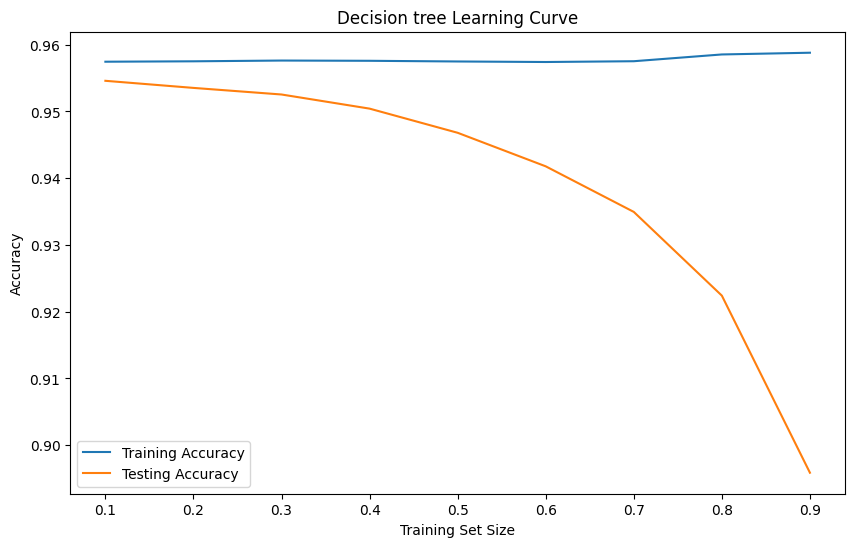

In [21]:
forestModel = RandomForestClassifier()
# LEARNING CURVE
training_sizes = np.linspace(0.1, 0.9, 9)
train_accuracies = []
test_accuracies = []

for size in training_sizes:
    # Use a subset of the training data
    
    X_train, X_test, Y_train, Y_test= train_test_split(X_up , Y_up, test_size=size, random_state=42)
    #print(subset_size)
    # Train the model on the subset
    forestModel.fit(X_train, Y_train)

    print(X_test.shape)
    # Calculate accuracy on both training and testing sets
    train_preds = forestModel.predict(X_train)
    test_preds = forestModel.predict(X_test)

    train_accuracies.append(accuracy_score(Y_train, train_preds))
    test_accuracies.append(accuracy_score(Y_test, test_preds))
    
    print(classification_report(Y_test,test_preds))
    print(confusion_matrix(Y_test,test_preds))
          
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_accuracies, label='Training Accuracy')
plt.plot(training_sizes, test_accuracies, label='Testing Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Decision tree Learning Curve')
plt.legend()
plt.show()

In [ ]:
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
# LEARNING CURVE
training_sizes = np.linspace(0.1, 0.9, 9)
train_accuracies = []
test_accuracies = []

for size in training_sizes:
    # Use a subset of the training data
    
    X_train, X_test, Y_train, Y_test= train_test_split(X_up , Y_up, test_size=size, random_state=42)
    #print(subset_size)
    # Train the model on the subset
    des_model.fit(X_train, Y_train)

    print(X_test.shape)
    # Calculate accuracy on both training and testing sets
    train_preds = des_model.predict(X_train)
    test_preds = des_model.predict(X_test)

    train_accuracies.append(accuracy_score(Y_train, train_preds))
    test_accuracies.append(accuracy_score(Y_test, test_preds))
    
    print(classification_report(Y_test,test_preds))
    print(confusion_matrix(Y_test,test_preds))
          
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_accuracies, label='Training Accuracy')
plt.plot(training_sizes, test_accuracies, label='Testing Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Decision tree Learning Curve')
plt.legend()
plt.show()

In [ ]:
"""from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    # Add more hyperparameters as needed
}

# Grid Search
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss'),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           n_jobs=-1)

# Random Search
random_search = RandomizedSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss'),
                                   param_distributions=param_grid,
                                   scoring='accuracy',
                                   n_iter=10,
                                   cv=3,
                                   n_jobs=-1)

grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(Y_test,predictions))
print(confusion_matrix(Y_test,predictions)) """

' model = KNeighborsClassifier(n_neighbors=2)\nmodel.fit(X_train,Y_train)\n\ntrain_pred = model.predict(X_train)\ntrain_accuracy = accuracy_score(Y_train, train_pred)\n\ntest_pred = model.predict(X_test)\ntest_accuracy = accuracy_score(Y_test, test_pred)\n\naccuracy = model.score(X_test, Y_test)\naccuracy\n\nprint(f"Accuracy: {accuracy}\n")\nprint ( \'Accuracy score: %.6f\' %accuracy_score ( Y_test, test_pred) )\n\n\nprint(classification_report(Y_test,test_pred))\nprint(confusion_matrix(Y_test,test_pred))\n\ntraining_sizes = np.linspace(0.1, 1.0, 10)\ntrain_accuracies = []\ntest_accuracies = []\n\nfor size in training_sizes:\n    # Use a subset of the training data\n    subset_size = int(size * len(X_train))\n    X_subset = X_train[:subset_size]\n    y_subset = Y_train[:subset_size]\n\n    # Train the model on the subset\n    model.fit(X_subset, y_subset)\n\n    # Calculate accuracy on both training and testing sets\n    train_preds = model.predict(X_subset)\n    test_preds = model.pre

In [ ]:
"""training_sizes = np.linspace(0.1, 1.0, 10)
train_accuracies = []
test_accuracies = []

for size in training_sizes:
    # Use a subset of the training data
    subset_size = int(size * len(X_train))
    X_subset = X_train[:subset_size]
    y_subset = Y_train[:subset_size]

    # Train the model on the subset
    best_model.fit(X_subset, y_subset)

    # Calculate accuracy on both training and testing sets
    train_preds = best_model.predict(X_subset)
    test_preds = best_model.predict(X_test)

    train_accuracies.append(accuracy_score(y_subset, train_preds))
    test_accuracies.append(accuracy_score(Y_test, test_preds))

# Plot the learning curve
plt.figure(figsize=(10, 6)) 
plt.plot(training_sizes, train_accuracies, label='Training Accuracy')
plt.plot(training_sizes, test_accuracies, label='Testing Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('XBOOST opt Learning Curve')
plt.legend()
plt.show()"""

" from sklearn.model_selection import learning_curve\n# Create a logistic regression model\nmodel = AdaBoostClassifier(n_estimators=50, random_state=42)\n\n# Create learning curves using scikit-learn's learning_curve function\ntrain_sizes, train_scores, test_scores = learning_curve(model, X_train, Y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))\n\n# Calculate the mean and standard deviation of training and test scores\ntrain_mean = np.mean(train_scores, axis=1)\ntrain_std = np.std(train_scores, axis=1)\ntest_mean = np.mean(test_scores, axis=1)\ntest_std = np.std(test_scores, axis=1)\n\n# Plot the learning curve\nplt.figure(figsize=(10, 6))\nplt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')\nplt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')\n\nplt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')\nplt.fill_between

In [ ]:
"""model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train,Y_train)

train_pred = model.predict(X_train)
train_accuracy = accuracy_score(Y_train, train_pred)

test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_pred)

accuracy = model.score(X_test, Y_test)
accuracy

print(f"Accuracy: {accuracy}\n")
print ( 'Accuracy score: %.6f' %accuracy_score ( Y_test, test_pred) )


print(classification_report(Y_test,test_pred))
print(confusion_matrix(Y_test,test_pred))

training_sizes = np.linspace(0.1, 1.0, 10)
train_accuracies = []
test_accuracies = []

for size in training_sizes:
    # Use a subset of the training data
    subset_size = int(size * len(X_train))
    X_subset = X_train[:subset_size]
    y_subset = Y_train[:subset_size]

    # Train the model on the subset 
    model.fit(X_subset, y_subset)

    # Calculate accuracy on both training and testing sets
    train_preds = model.predict(X_subset)
    test_preds = model.predict(X_test)

    train_accuracies.append(accuracy_score(y_subset, train_preds))
    test_accuracies.append(accuracy_score(Y_test, test_preds))

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_accuracies, label='Training Accuracy')
plt.plot(training_sizes, test_accuracies, label='Testing Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Ada boosting Learning Curve')
plt.legend()
plt.show() """

In [67]:
# Save the trained model using joblib
joblib.dump(decTree_model, 'MLmodels/decisionTree_model.joblib')

# Load the model back from the file
decisionTreeModel = joblib.load('MLmodels/decisionTree_model.joblib')

In [72]:
# Now you can use the loaded_model for predictions
new_data = [[70000000, 57, 2, 1, 2, 1, 3, 2, 12]]  # Example new data point
prediction = decisionTreeModel.predict(new_data)

print(f'Predicted Class for New Data: {prediction}')

Predicted Class for New Data: [0]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [69]:
# Save the trained model using joblib
joblib.dump(logReg_model, 'MLmodels/logReg_model.joblib')


# Load the model back from the file
logRegModel = joblib.load('MLmodels/logReg_model.joblib')

In [ ]:
# Save the trained model using joblib
joblib.dump(forestModel, 'MLmodels/randomForest_model.joblib')
# Load the model back from the file
logRegModel = joblib.load('MLmodels/randomForest_model.joblib')